# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2023.09.13.1.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- write your Python code that can answer the following questions 
- explain **ALL** your answers in plain English. 
- you can use as many code and markdown cells as you need for each question (i.e. don't limit yourself to just one of each if you feel you need more).

In [3]:
MY_UNIQNAME = 'prathuj'  # replace this with your uniqname

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What is the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

**Ans 1.1**

In [5]:
# put your code here
# read json file using pandas
invoice_df = pd.read_json(
    'https://github.com/umsi-data-science/data/raw/main/invoices.json')
items_df = pd.read_json(
    'https://github.com/umsi-data-science/data/raw/main/items.json')
purchase_df = pd.read_json(
    'https://github.com/umsi-data-science/data/raw/main/purchases.json')


In [6]:
invoice_df.tail()

,InvoiceNo,InvoiceDate,CustomerID,Country
25938,581583,12/9/11 12:23,13777.0,United Kingdom
25939,581584,12/9/11 12:25,13777.0,United Kingdom
25940,581585,12/9/11 12:31,15804.0,United Kingdom
25941,581586,12/9/11 12:49,13113.0,United Kingdom
25942,581587,12/9/11 12:50,12680.0,France


In [7]:
invoice_df.shape

(25943, 4)

In [8]:
items_df.tail()

,StockCode,Description,UnitPrice
4065,85179a,GREEN BITTY LIGHT CHAIN,2.46
4066,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91
4067,90214U,"LETTER ""U"" BLING KEY RING",0.29
4068,47591b,SCOTTIES CHILDRENS APRON,4.13
4069,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08


In [9]:
purchase_df.tail()

,InvoiceNo,StockCodeSC,Quantity
541904,581587,SC22613,12
541905,581587,SC22899,6
541906,581587,SC23254,4
541907,581587,SC23255,4
541908,581587,SC22138,3


In [10]:
# drop purchases with InvoiceNo starting with 'C'
purchase_df = purchase_df[~purchase_df['InvoiceNo'].str.startswith('C')]

In [11]:
# invoices that begin with the letter 'c' or 'C'
invoice_df[invoice_df['InvoiceNo'].str.startswith('C') |
           invoice_df['InvoiceNo'].str.startswith('c')]

,InvoiceNo,InvoiceDate,CustomerID,Country
16,C536379,12/1/10 9:41,14527.0,United Kingdom
18,C536383,12/1/10 9:49,15311.0,United Kingdom
26,C536391,12/1/10 10:24,17548.0,United Kingdom
63,C536506,12/1/10 12:38,17897.0,United Kingdom
88,C536543,12/1/10 14:30,17841.0,United Kingdom
...,...,...,...,...
25903,C581484,12/9/11 9:27,16446.0,United Kingdom
25909,C581490,12/9/11 9:57,14397.0,United Kingdom
25918,C581499,12/9/11 10:28,15498.0,United Kingdom
25927,C581568,12/9/11 11:57,15311.0,United Kingdom


In [12]:
# discard the rows with above condition
invoice_df = invoice_df[~invoice_df['InvoiceNo'].str.startswith('C')]

In [13]:
# invoice number duplicates
invoice_df[invoice_df.duplicated(subset=['InvoiceNo'])].sort_values(
    by=['InvoiceNo']).shape

(42, 4)

In [14]:
# count no of invoices
print("Count of Invoices in invoice_df: ",invoice_df['InvoiceNo'].nunique())

Count of Invoices in invoice_df:  22064


**Ans 1.2**

|Invoice Dataset Entries  | 25943 |
|--|--|
| Cancelled Invoices| 3837 |
| Duplicate Invoices | 42 |
| Unique Invoices Placed | 22604 |


**Ans 1.3**

In [15]:
# count unique customers
print("Count of unique customers in invoice_df: ",
      invoice_df['CustomerID'].nunique())

Count of unique customers in invoice_df:  4339


**Ans 1.4**

In [16]:
# count unique items
print("Count of unique items in items_df: ", items_df['StockCode'].nunique())

Count of unique items in items_df:  4070


**Ans 1.5**

In [17]:
# identify missing values
print("Missing values in invoice_df:\n", dict(invoice_df.isnull().sum()))
print("Missing values in items_df:\n", dict(items_df.isnull().sum()))
print("Missing values in purchase_df:\n", dict(purchase_df.isnull().sum()))

Missing values in invoice_df:
 {'InvoiceNo': 0, 'InvoiceDate': 0, 'CustomerID': 3540, 'Country': 0}
Missing values in items_df:
 {'StockCode': 0, 'Description': 176, 'UnitPrice': 0}
Missing values in purchase_df:
 {'InvoiceNo': 0, 'StockCodeSC': 0, 'Quantity': 0}


**Ans 1.6**
- Total 22064 Invoices have been placed.
- There are 4339 unique customers.
- The dataset has 4070 unique items
- Two columns with null values
    1. *CustomerID* in invoice_df: 3722,
    2. *Description* in items_df: 176
- One way of joining the data sets is
    1. Join *invoice_df* and *purchase_df* on *InvoiceNo*
    2. Join *items_df* and *purchase_df* on *StockCode*, however, *purchase_df* has a column *StockCodeSC* which seems that it has a prefix of **SC** in every *StockCodeSC* string

### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

**Ans 2.1**

In [18]:
# put your code here
# no of invoices per customer in descending order
invoice_df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(
    ascending=False).head(11)

CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
18102.0     60
Name: InvoiceNo, dtype: int64

In [19]:
# left join invoice_df and purchase_df
invoice_purchase_df = pd.merge(invoice_df, purchase_df,
                               on='InvoiceNo', how='left')
invoice_purchase_df.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity
0,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6
1,536365,12/1/10 8:26,17850.0,United Kingdom,SC71053,6
2,536365,12/1/10 8:26,17850.0,United Kingdom,SC84406B,8
3,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029G,6
4,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029E,6


In [20]:
# count unique invoices in invoice_purchase_df
print("Count of unique invoices in invoice_purchase_df: ",
      invoice_purchase_df['InvoiceNo'].nunique())

Count of unique invoices in invoice_purchase_df:  22064


**Ans 2.2**

In [21]:
# quantity of items per customer in descending order
invoice_purchase_df.groupby('CustomerID')['Quantity'].sum().sort_values(
    ascending=False).head(11)

CustomerID
14646.0    197491
14911.0     81009
16446.0     80997
12415.0     77670
12346.0     74215
17450.0     69993
17511.0     67423
18102.0     64124
13694.0     63312
14298.0     58343
14156.0     57885
Name: Quantity, dtype: int64

In [22]:
# number of invoices for CustomerID 12415
print("Query 1: ",invoice_purchase_df[invoice_purchase_df['CustomerID']
                     == 12415]['InvoiceNo'].nunique())
print("Query 2: ",invoice_purchase_df[invoice_purchase_df['InvoiceNo']
                     == '556691']['Quantity'].sum())

# min, max, mean, median of quantity
print("Min: ", invoice_purchase_df['Quantity'].min())
print("Max: ", invoice_purchase_df['Quantity'].max())
print("Mean: ", invoice_purchase_df['Quantity'].mean())
print("Median: ", invoice_purchase_df['Quantity'].median())

Query 1:  21
Query 2:  -9600
Min:  -9600
Max:  80995
Mean:  10.220732697097759
Median:  3.0


In [23]:
# invoice with min quantity
print("Invoice with min quantity: ",
      invoice_purchase_df[invoice_purchase_df['Quantity']
                          == invoice_purchase_df['Quantity'].min()]
                          ['InvoiceNo'].unique())

Invoice with min quantity:  ['556690' '556691']


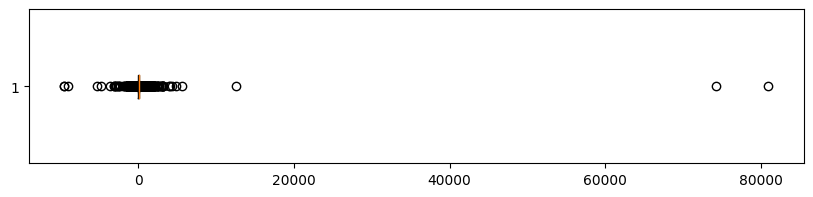

In [24]:
# horizontal boxplot of quantity
figure = plt.figure(figsize=(10, 2))
plt.boxplot(invoice_purchase_df['Quantity'], vert=False)
plt.show()

In [25]:
# create a dataframe
CustomerID = [14646, 14911, 15311, 18102, 12415]
Quantity = [196719, 81009, 37720, 64124, 77670]
Invoices = [74, 201, 91, 60, 21]

quantity_items_df = pd.DataFrame(
    {'CustomerID': CustomerID, 'Quantity': Quantity, 'Invoices': Invoices})

quantity_items_df

,CustomerID,Quantity,Invoices
0,14646,196719,74
1,14911,81009,201
2,15311,37720,91
3,18102,64124,60
4,12415,77670,21


**Ans 2.3**

The Quantity of items is not proportional to the number of Invoices generated. This is shown from:
1. CustomerID 14911 and CustomerID 12415 both have around 80k items, but the number of invoices differ by 10 times.
2. CustomerID 14646 has larger Quantity of items than CustomerID 14911 but lower number of Invoices
3. As per the boxplot, the Quantity of Items per invoice varies exponentially. So it does not suggest a direct relation between them.

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $25?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

In [26]:
items_df.tail()

,StockCode,Description,UnitPrice
4065,85179a,GREEN BITTY LIGHT CHAIN,2.46
4066,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91
4067,90214U,"LETTER ""U"" BLING KEY RING",0.29
4068,47591b,SCOTTIES CHILDRENS APRON,4.13
4069,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08


**Ans 3.1**

In [27]:
# average unit price of items
print("Average item-unit price: ",
      items_df['UnitPrice'].mean().__round__(2), "$")
print("Median item-unit price: ",
      items_df['UnitPrice'].median().__round__(2), "$")
print("Min item-unit price: ",
      items_df['UnitPrice'].min().__round__(2), "$")
print("Max item-unit price: ",
      items_df['UnitPrice'].max().__round__(2), "$")

Average item-unit price:  6.91 $
Median item-unit price:  2.51 $
Min item-unit price:  0.0 $
Max item-unit price:  11062.06 $


In [28]:
# number of items under 25 $
print("Number of items under 25$: ",
      items_df[items_df['UnitPrice'] < 25]['StockCode'].nunique())

Number of items under 25$:  4019


**Ans 3.2**

In [29]:
# percentage of items under 25 $
print("Percentage of items under 25$: ",
      ((items_df[items_df['UnitPrice'] < 25]['UnitPrice'].count()
        / items_df['UnitPrice'].count())).__round__(4)*100, "%")

Percentage of items under 25$:  98.75 %


**Ans 3.3**

#### Step 1/4 : Plotting Histogram
First I saw the scope of the Unit-price values by plotting a box plot. This shows concentration of values around lower range i.e. 0-600 \$ and an outlier >10000 \$.

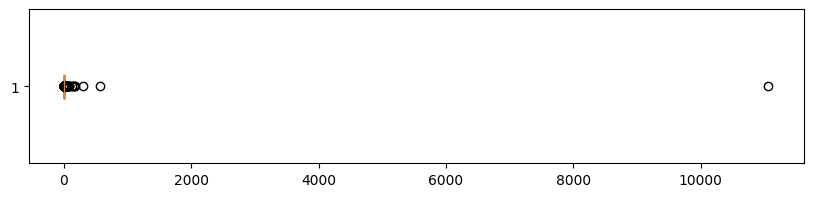

In [30]:
# boxplot of unit price
figure = plt.figure(figsize=(10, 2))
plt.boxplot(items_df['UnitPrice'], vert=False)
plt.show()


#### Step 2/4 : Plotting Histogram
Then I decide to plot 0 - 50 \$ range as a histogram. The histogram is highly skewed with large concentrations of higher values in 0 - 20 \$ range.

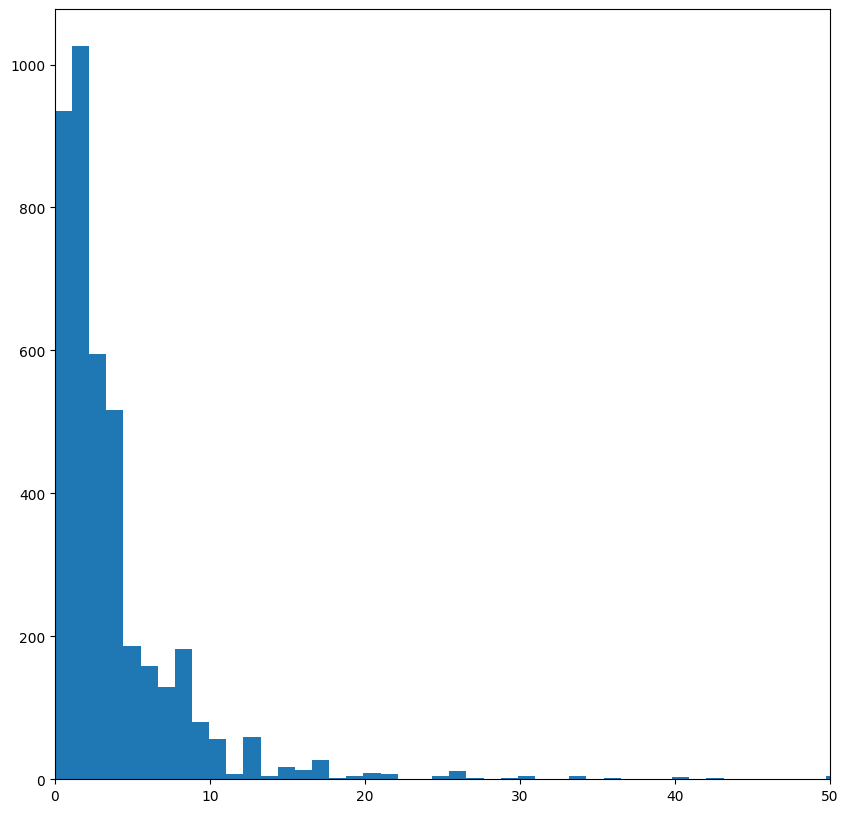

In [31]:
figure = plt.figure(figsize=(10, 10))
plt.hist(items_df['UnitPrice'], bins=10000)
plt.xlim(0, 50)
# plt.ylim(0, 10)
plt.show()

#### Step 3/4 : Plotting Histogram
In the third setting I have plotted the intermediate range of 20 - 50 $ histogram of unit-prices.

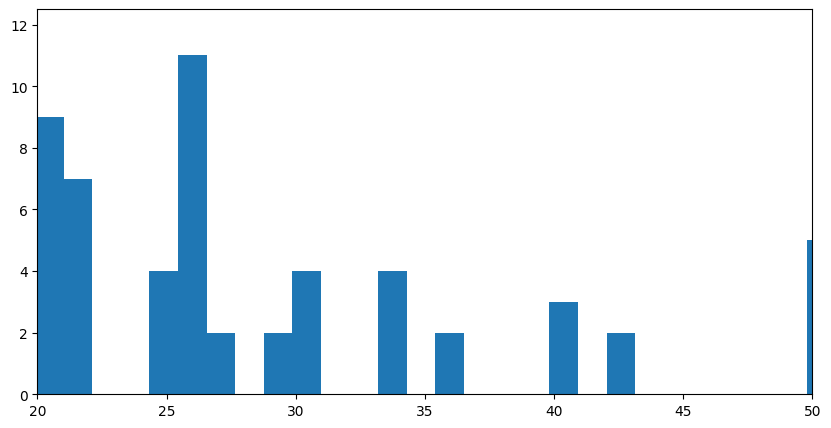

In [32]:
# histogram of unit price
figure = plt.figure(figsize=(10, 5))
plt.hist(items_df['UnitPrice'], bins=10000)
plt.xlim(20, 50)
plt.ylim(0, 12.5)
plt.show()

#### Step 4/4 : Plotting Histogram
To get a detailed view of the values beyond that range, I plot histogram of 50 - 600 $ price range with a focus to identify the smaller values, I have reduced the y-axis limit to 6 items.

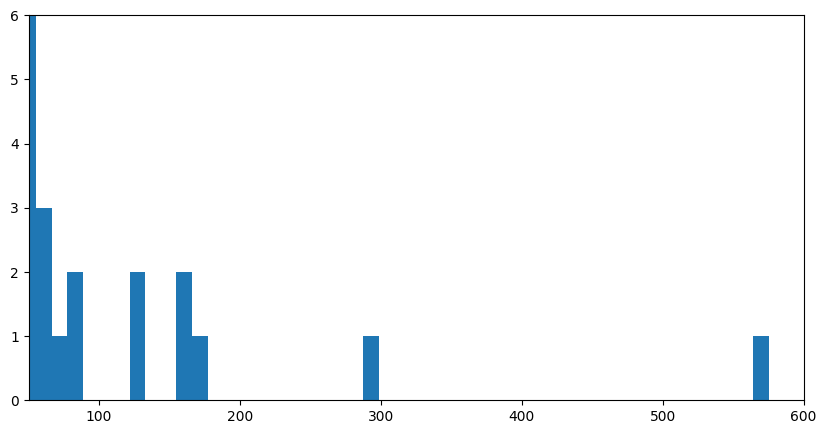

In [33]:
# put your code here
# histogram of unit price
figure = plt.figure(figsize=(10, 5))
plt.hist(items_df['UnitPrice'], bins=1000)
plt.xlim(50, 600)
plt.ylim(0, 6)
plt.show()


The histogram plot of UnitPrice values is highly skewed towards right and so was split into three ranges for a better view of visualizing the distribution, the ranges being:
1. 0 - 50
2. 20 - 50, ylim = 12.5
3. 50 - 600, ylim = 6

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them. Do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.) 
1. Do the top 5 invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

In [34]:
# check if StockcodeSC in purchase_df has SC in prefix
purchase_df[purchase_df['StockCodeSC'].str.startswith('SC')].__len__()

532621

Since **all** StockCodeSC begin with 'SC' , I will trim the StockCodeSC before combining the datasets

In [35]:
# trim SC from StockCodeSC
invoice_purchase_df['StockCode'] = invoice_purchase_df['StockCodeSC']\
    .str.lstrip('SC')
invoice_purchase_df.drop(columns=['StockCodeSC'], inplace=True)
invoice_purchase_df.tail()

,InvoiceNo,InvoiceDate,CustomerID,Country,Quantity,StockCode
535960,581587,12/9/11 12:50,12680.0,France,12,22613
535961,581587,12/9/11 12:50,12680.0,France,6,22899
535962,581587,12/9/11 12:50,12680.0,France,4,23254
535963,581587,12/9/11 12:50,12680.0,France,4,23255
535964,581587,12/9/11 12:50,12680.0,France,3,22138


In [36]:
# merge invoice_purchase_df and items_df
invoice_purchase_items_df = pd.merge(
    invoice_purchase_df, items_df, on='StockCode')

invoice_purchase_items_df.tail()

,InvoiceNo,InvoiceDate,CustomerID,Country,Quantity,StockCode,Description,UnitPrice
535816,579297,11/29/11 11:23,NaN,United Kingdom,1,85179a,GREEN BITTY LIGHT CHAIN,2.46
535817,579512,11/29/11 16:47,NaN,United Kingdom,2,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91
535818,580691,12/5/11 15:48,13790.0,United Kingdom,12,90214U,"LETTER ""U"" BLING KEY RING",0.29
535819,581238,12/8/11 10:53,NaN,United Kingdom,1,47591b,SCOTTIES CHILDRENS APRON,4.13
535820,581483,12/9/11 9:15,16446.0,United Kingdom,80995,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08


**Ans 4.1**

In [37]:
# put your code here
# top 10 most ordered items with description and stockcode
top_items = invoice_purchase_items_df.groupby(['Description','StockCode'])\
    ['Quantity'].sum().sort_values(ascending=False)
top_items.head(11)

Description                         StockCode
PAPER CRAFT , LITTLE BIRDIE         23843        80995
MEDIUM CERAMIC TOP STORAGE JAR      23166        78033
SMALL POPCORN HOLDER                22197        57767
WORLD WAR 2 GLIDERS ASSTD DESIGNS   84077        55100
JUMBO BAG RED RETROSPOT             85099B       48877
WHITE HANGING HEART T-LIGHT HOLDER  85123A       41534
PACK OF 72 RETROSPOT CAKE CASES     21212        36502
ASSORTED COLOUR BIRD ORNAMENT       84879        36353
RABBIT NIGHT LIGHT                  23084        30771
MINI PAINT SET VINTAGE              22492        26668
PACK OF 12 LONDON TISSUES           22616        26449
Name: Quantity, dtype: int64

The list of most ordered items seem to be a birthday party list or a movie night list. It also seems that people are more interested in baking cakes or in decorating their rooms with paints or hanging lights.

As the sales are mostly focused around the year end, we could interprete this as a holiday season shopping list.

In [38]:
# unit price times quantity up by 25 %
invoice_purchase_items_df['Revenue'] =\
    (invoice_purchase_items_df['UnitPrice']
    * invoice_purchase_items_df['Quantity'])\
    .apply(lambda x: x*1.25)

**Ans 4.2**

In [39]:
# top 5 invoices with highest revenue
top_invoices =\
    invoice_purchase_items_df.groupby('InvoiceNo')['Revenue']\
        .sum().sort_values(ascending=False)

top_invoices.head(6)

InvoiceNo
547966    712212.5000
581483    210587.0000
541431     96479.5000
556255     37305.0000
556917     34545.9125
572035     32872.2000
Name: Revenue, dtype: float64

To find whether top 5 invoices contain any of the top 10 most ordered items

In [40]:
# get the invoice numbers as a list
invoice_list = top_invoices[0:5].index.tolist()
invoice_list

['547966', '581483', '541431', '556255', '556917']

In [41]:
# get description list
description_list = top_items.index.get_level_values(1)[0:10].tolist()
description_list

['23843',
 '23166',
 '22197',
 '84077',
 '85099B',
 '85123A',
 '21212',
 '84879',
 '23084',
 '22492']

**Ans 4.3**

In [42]:
invoice_purchase_items_df[
    invoice_purchase_items_df['InvoiceNo'].isin(invoice_list)\
        & invoice_purchase_items_df['StockCode'].isin(description_list)]\
        .sort_values(by=['InvoiceNo', 'StockCode'])[
            ['InvoiceNo', 'StockCode', 'Description']]

,InvoiceNo,StockCode,Description
434473,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR
38803,556917,21212,PACK OF 72 RETROSPOT CAKE CASES
22297,556917,22492,MINI PAINT SET VINTAGE
472477,556917,23084,RABBIT NIGHT LIGHT
434529,556917,23166,MEDIUM CERAMIC TOP STORAGE JAR
68922,556917,85099B,JUMBO BAG RED RETROSPOT
535820,581483,23843,"PAPER CRAFT , LITTLE BIRDIE"


Three Invoices #541431, #556917 and #581483 contain 1, 5 and 1 items from top 10 list respectively.

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1750  
 * medium value: between 1750 and 8250 dollars
 * high value: greater than \$8250
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Choose three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

**Ans 5.1**

In [43]:
# put your code here
# create customer segments based on revenue generated using pd.cut
# group by customerID and sum of revenue
customer_segments = invoice_purchase_items_df.groupby(
    'CustomerID')['Revenue'].sum().__round__(2)

print("Max revenue ($): ", customer_segments.max())

# create a dataframe
customer_segments_df = pd.DataFrame(
    {'CustomerID': customer_segments.index,
    'Total_Revenue_per_Customer': customer_segments.values})

# create a new column RevenueSegment
customer_segments_df['CustomerSegment'] = pd.cut(
    customer_segments_df['Total_Revenue_per_Customer'],
    bins=[0, 1750, 8250, customer_segments.max()],
    labels=['Low', 'Medium', 'High'])

# value counts of customer segments
customer_segments_df['CustomerSegment'].value_counts()

Max revenue ($):  510949.95


CustomerSegment
Low       2845
Medium    1254
High       240
Name: count, dtype: int64

In [44]:
# Using the pivot table function, create a table that displays the average 
# order quantity of each stock code for a given segment.

# create a new dataframe
customer_segments_pivot_df = pd.merge(
    invoice_purchase_items_df, customer_segments_df, on='CustomerID')

**Ans 5.2**

In [53]:
# pivot table
pivot_table = customer_segments_pivot_df.pivot_table(
    index=['StockCode','Description'], columns='CustomerSegment',
    values='Quantity', aggfunc='mean')

pivot_table.sample(6)
                                       

,CustomerSegment,Low,Medium,High
StockCode,Description,,,
20735,BLACK MINI TAPE MEASURE,2.000000,2.833333,6.428571
20757,RED DAISY POCKET BOOK,3.666667,7.076923,3.500000
21368,MIRRORED WALL ART LADIES,1.500000,5.166667,11.571429
75172,PAINTED SEA SHELL METAL WINDCHIME,12.800000,9.666667,NaN
23523,TREASURE AHOY WALL ART,5.375000,3.625000,18.285714
20974,12 PENCILS SMALL TUBE SKULL,13.241379,13.787500,59.315789


**Ans 5.3**

In [54]:
pivot_table.sort_values(by='High', ascending=False).head(7)

,CustomerSegment,Low,Medium,High
StockCode,Description,,,
23843,"PAPER CRAFT , LITTLE BIRDIE",NaN,NaN,80995.000000
84826,ASSTD DESIGN 3D PAPER STICKERS,15.846154,39.777778,2556.000000
23166,MEDIUM CERAMIC TOP STORAGE JAR,10.647059,10.873016,912.952381
84568,GIRLS ALPHABET IRON ON PATCHES,452.571429,288.000000,840.000000
84422,PINK/BLUE DISC/MIRROR STRING,9.500000,11.000000,480.000000
16033,MINI HIGHLIGHTER PENS,NaN,120.000000,480.000000
17003,BROCADE RING PURSE,69.242857,73.546392,261.476190


In [55]:
# sort the pivot table by the average order quantity of the Medium segment
pivot_table.sort_values(by='Medium', ascending=False).head(7)

,CustomerSegment,Low,Medium,High
StockCode,Description,,,
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,16.000000,710.000000,24.000000
16014,SMALL CHINESE STYLE SCISSOR,19.571429,390.636364,23.285714
84568,GIRLS ALPHABET IRON ON PATCHES,452.571429,288.000000,840.000000
84598,BOYS ALPHABET IRON ON PATCHES,288.000000,288.000000,192.000000
22053,EMPIRE DESIGN ROSETTE,10.000000,285.857143,24.250000
21785,RAIN PONCHO,NaN,204.000000,1.000000
62018,SOMBRERO,34.533333,147.320000,10.100000


In [56]:
pivot_table.sort_values(by='Low', ascending=False).head(7)

,CustomerSegment,Low,Medium,High
StockCode,Description,,,
17096,ASSORTED LAQUERED INCENSE HOLDERS,516.750000,36.714286,96.000000
84568,GIRLS ALPHABET IRON ON PATCHES,452.571429,288.000000,840.000000
84598,BOYS ALPHABET IRON ON PATCHES,288.000000,288.000000,192.000000
16045,POPART WOODEN PENCILS ASST,151.851852,103.846154,131.250000
16259,PIECE OF CAMO STATIONERY SET,122.833333,86.166667,124.571429
17084R,ASSORTED INCENSE PACK,120.000000,80.000000,248.000000
16049,TEATIME GEL PENS ASST,90.000000,144.000000,90.000000


NO.
Items with highest average order quantity are not the same across Segments. For example:
- StockCode #23843 records for highest quantity in High segment but dose not exist in Medium and Low segment sections
- StockCode #84568 is in top 5 for Low and Medium as well as in High segment
- StockCode #17096 has highest quantity in Low segment but for Medium and High segments it is quiet low



**Ans 5.4**

- 'PAPER CRAFT , LITTLE BIRDIE' is the item that goes in High segment but not in Medium and Low segment category
- 'GIRLS ALPHABET IRON ON PATCHES' is a high revenue collection item in Low, Medium as well as in High segment
- 'RAIN PONCHO' mainly exists as a Medium segment item.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas

**Disclaimer :** Used Github Copilot for assistance with the code